In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from modules.lv_utils import load_households
from modules.lv_utils import load_voters

In [2]:
# load the data
households = load_households('data_clean/20180627_fullset_households_district3.csv')
voters = load_voters('data_clean/20180627_fullset_voters_district3.csv')
elections = pd.read_csv('data_clean/20180621_election_data.csv')

In [3]:
v = voters
h = households
e = elections
print(v.columns)
print(h.columns)
e.columns

Index(['Vid', 'Abbr', 'Precinct', 'PrecinctSub', 'Party', 'PartyMain',
       'RegDate', 'PAV', 'RegDateOriginal', 'E6_110816', 'E5_060716',
       'E4_110414', 'E3_060314', 'E2_110612', 'E1_060512', 'District',
       'VScore', 'VScorePos', 'VScorePct', 'BirthYear',
       'OldestInHouseBirthYear', 'IsOldestInHouse', 'havePhone',
       'BirthPlaceState', 'BirthPlaceCountry', 'Gender', 'sameMailAddress',
       'MailCountry', 'isApt', 'Zip', 'StreetType', 'EmailProvider',
       'E5_060716BT', 'E1_060512BT', 'Hid', 'cHid', 'E34_nVotesPos',
       'E34_nVotes', 'E34_nVotesPct', 'E56_nVotesPos', 'E56_nVotes',
       'E56_nVotesPct', 'E78_nVotesPos', 'E78_nVotes', 'E78_nVotesPct',
       'nVotersInHH', 'PAVCode', 'nPAVInHH', 'HasParty', 'nAffInHH', 'isDEM',
       'isREP', 'isNPP', 'nDEMInHH', 'nREPInHH', 'nNPPInHH',
       'E34_nVotesPosInHH', 'E34_nVotesInHH', 'E34_nVotesPctInHH',
       'E56_nVotesPosInHH', 'E56_nVotesInHH', 'E56_nVotesPctInHH',
       'E78_nVotesPosInHH', 'E78_nVotes

Index(['elections', 'dates', 'cycle', 'etype', 'president', 'us_senate_maj',
       'us_repre_maj', 'ca_governor', 'ca_lt_govnor', 'ca_senate_maj',
       'ca_assembly_maj'],
      dtype='object')

### Initial look at voter rate distribution

In [4]:
df34 = v.loc[v.E34_nVotesPct>=0,['E34_nVotesPct','Vid']].set_index('Vid')
df56 = v.loc[v.E56_nVotesPct>=0,['E56_nVotesPct','Vid']].set_index('Vid')
df78 = v.loc[v.E78_nVotesPct>=0,['E78_nVotesPct','Vid']].set_index('Vid')

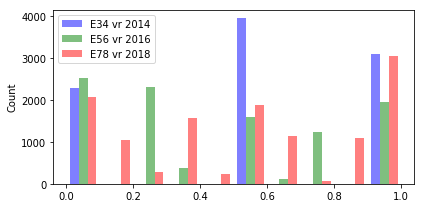

In [5]:
plt.rcParams["figure.figsize"] = (6,3)

fig, ax1 = plt.subplots()
ax1.hist([df34.values, df56.values, df78.values], color=['b','g','r'], 
         alpha=0.5, bins=10,
         label=['E34 vr 2014','E56 vr 2016','E78 vr 2018'])

ax1.set_ylabel("Count")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [6]:
print('number of voters in E34 data {}'.format(len(df34)))
print('number of voters in E56 data {}'.format(len(df56)))
print('number of voters in E78 data {}'.format(len(df78)))

number of voters in E34 data 9303
number of voters in E56 data 10043
number of voters in E78 data 12378


#### and compare the E78 data with my friends weighted vote rate score

In [7]:
dfvs = v.loc[v.VScorePct >= 0, ['VScorePct','Vid']].set_index('Vid')

In [8]:
x = dfvs.values
y = df78.values
#print(df78.E78_nVotesPct.value_counts())
#print(dfvs.VScorePct.value_counts())

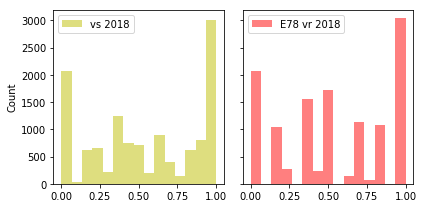

In [9]:
bins=15
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
ax1.hist(x, color='y', alpha=0.5, label='vs 2018', bins=bins)
ax1.legend(loc='upper left')
ax1.set_ylabel("Count")

ax2.hist(y, color='r', alpha=0.5, label='E78 vr 2018', bins=bins)
ax2.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Initial look at vote rate against age (aka BirthYear)

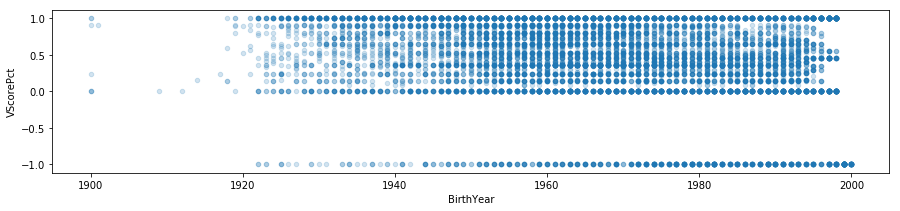

In [10]:
plt.rcParams["figure.figsize"] = (15,3)
df = v[['VScorePct','BirthYear']].sort_values('VScorePct')
df.plot(kind='scatter', x='BirthYear', y='VScorePct', alpha = 0.2)
plt.show()

Grouping into the 3 behavior groups you can see above, people who always vote, sometimes vote and never vote. Comparing distributions against age.

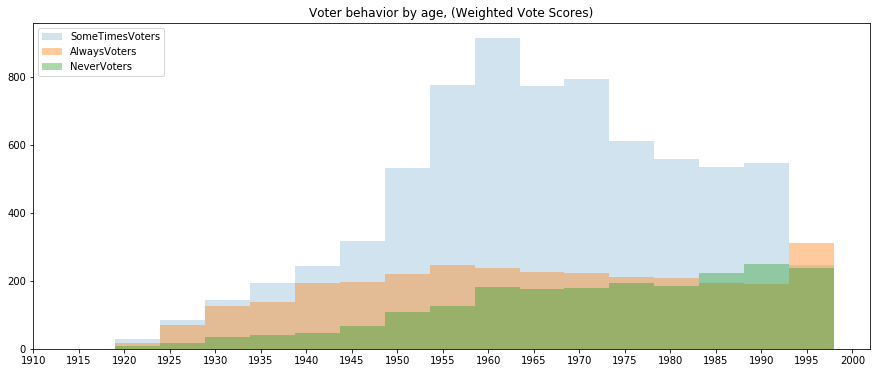

In [68]:
realVoters = v.loc[(v.BirthYear > 1918) & (v.BirthYear < 2010)]

plt.rcParams["figure.figsize"] = (15,6)
fig, ax1 = plt.subplots()
ax1.hist(realVoters.loc[(v.VScorePct < 1) & (v.VScorePct > 0),'BirthYear'], bins=16, alpha=0.2,
         label='SomeTimesVoters')
ax1.hist(realVoters.loc[(v.VScorePct == 1),'BirthYear'], bins=16, alpha=0.4,
         label='AlwaysVoters')
ax1.hist(realVoters.loc[(v.VScorePct == 0),'BirthYear'], bins=16, alpha=0.4,
         label='NeverVoters')

ax1.legend(loc='upper left')
ax1.set_title('Voter behavior by age, (Weighted Vote Scores)')
plt.xticks(np.arange(1910, 2005, step=5))
plt.show()

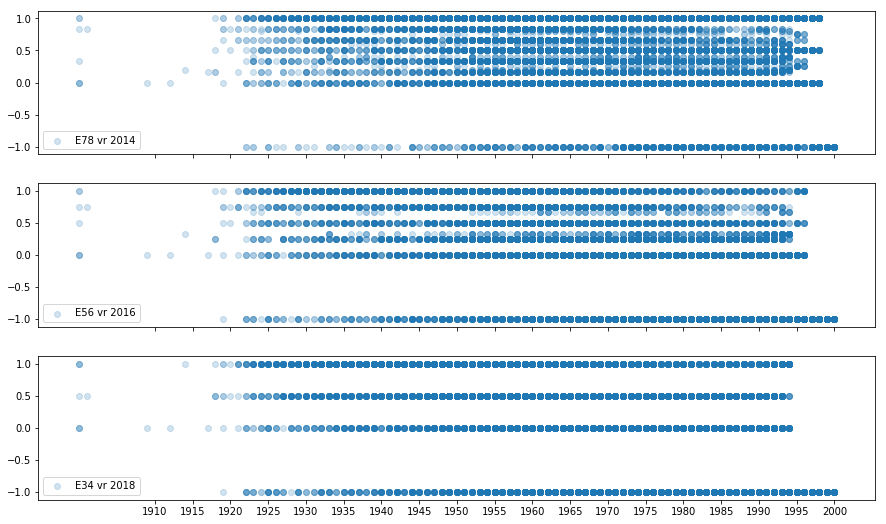

In [69]:
plt.rcParams["figure.figsize"] = (15,9)
df = v[['E34_nVotesPct','E56_nVotesPct','E78_nVotesPct','BirthYear']].sort_values('BirthYear')

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True)
ax1.scatter(x=df.BirthYear, y=df.E78_nVotesPct, alpha = 0.2, label='E78 vr 2014')
ax1.legend(loc='lower left')
ax2.scatter(x=df.BirthYear, y=df.E56_nVotesPct, alpha = 0.2, label='E56 vr 2016')
ax2.legend(loc='lower left')
ax3.scatter(x=df.BirthYear, y=df.E34_nVotesPct, alpha = 0.2, label='E34 vr 2018')
ax3.legend(loc='lower left')
plt.xticks(np.arange(1910, 2005, step=5))
plt.show()

In [70]:
realVoters.columns

Index(['Vid', 'Abbr', 'Precinct', 'PrecinctSub', 'Party', 'PartyMain',
       'RegDate', 'PAV', 'RegDateOriginal', 'E6_110816', 'E5_060716',
       'E4_110414', 'E3_060314', 'E2_110612', 'E1_060512', 'District',
       'VScore', 'VScorePos', 'VScorePct', 'BirthYear',
       'OldestInHouseBirthYear', 'IsOldestInHouse', 'havePhone',
       'BirthPlaceState', 'BirthPlaceCountry', 'Gender', 'sameMailAddress',
       'MailCountry', 'isApt', 'Zip', 'StreetType', 'EmailProvider',
       'E5_060716BT', 'E1_060512BT', 'Hid', 'cHid', 'E34_nVotesPos',
       'E34_nVotes', 'E34_nVotesPct', 'E56_nVotesPos', 'E56_nVotes',
       'E56_nVotesPct', 'E78_nVotesPos', 'E78_nVotes', 'E78_nVotesPct',
       'nVotersInHH', 'PAVCode', 'nPAVInHH', 'HasParty', 'nAffInHH', 'isDEM',
       'isREP', 'isNPP', 'nDEMInHH', 'nREPInHH', 'nNPPInHH',
       'E34_nVotesPosInHH', 'E34_nVotesInHH', 'E34_nVotesPctInHH',
       'E56_nVotesPosInHH', 'E56_nVotesInHH', 'E56_nVotesPctInHH',
       'E78_nVotesPosInHH', 'E78_nVotes

In [71]:
E34v = pd.DataFrame(realVoters[['E34_nVotesPct','BirthYear']]).rename(
    columns = {'E34_nVotesPct':'VoteRate'})
E56v = pd.DataFrame(realVoters[['E56_nVotesPct','BirthYear']]).rename(
    columns = {'E56_nVotesPct':'VoteRate'})
E78v = pd.DataFrame(realVoters[['E78_nVotesPct','BirthYear']]).rename(
    columns = {'E78_nVotesPct':'VoteRate'})

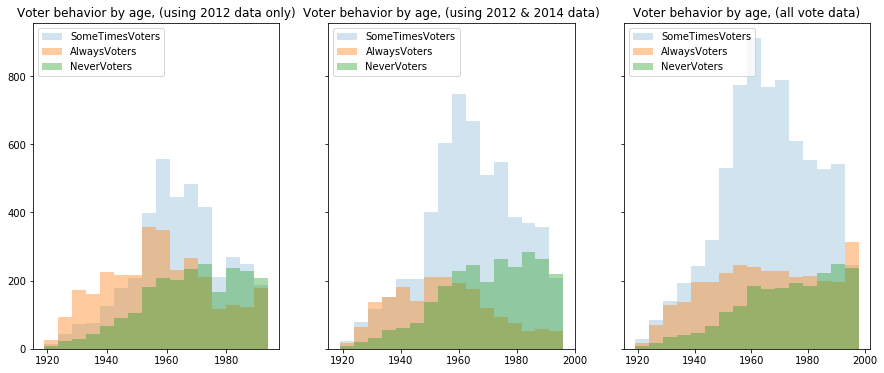

In [72]:

plt.rcParams["figure.figsize"] = (15,6)
fig, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True)
n, b, p = ax1.hist(E34v.loc[(E34v.VoteRate < 1) & (E34v.VoteRate > 0),'BirthYear'], bins=16, alpha=0.2,
        label='SomeTimesVoters')
n, b, p = ax1.hist(E34v.loc[(E34v.VoteRate == 1),'BirthYear'], bins=16, alpha=0.4,
         label='AlwaysVoters')
n, b, p = ax1.hist(E34v.loc[(E34v.VoteRate == 0),'BirthYear'], bins=16, alpha=0.4,
         label='NeverVoters')
ax1.legend(loc='upper left')
ax1.set_title('Voter behavior by age, (using 2012 data only)')

n, b, p = ax2.hist(E56v.loc[(E56v.VoteRate < 1) & (E56v.VoteRate > 0),'BirthYear'], bins=16, alpha=0.2,
        label='SomeTimesVoters')
n, b, p = ax2.hist(E56v.loc[(E56v.VoteRate == 1),'BirthYear'], bins=16, alpha=0.4,
         label='AlwaysVoters')
n, b, p = ax2.hist(E56v.loc[(E56v.VoteRate == 0),'BirthYear'], bins=16, alpha=0.4,
         label='NeverVoters')
ax2.legend(loc='upper left')
ax2.set_title('Voter behavior by age, (using 2012 & 2014 data)')

n, b, p = ax3.hist(E78v.loc[(E78v.VoteRate < 1) & (E78v.VoteRate > 0),'BirthYear'], bins=16, alpha=0.2,
        label='SomeTimesVoters')
n, b, p = ax3.hist(E78v.loc[(E78v.VoteRate == 1),'BirthYear'], bins=16, alpha=0.4,
         label='AlwaysVoters')
n, b, p = ax3.hist(E78v.loc[(E78v.VoteRate == 0),'BirthYear'], bins=16, alpha=0.4,
         label='NeverVoters')
ax3.legend(loc='upper left')
ax3.set_title('Voter behavior by age, (all vote data)')

plt.show()

The always vote group skews older, the never vote group skews younger, the different distributions are most marked in the congressional 'off election' year 2014

## Looking for other patterns, focusing on the 3 sets of vote rate data only

In [16]:
v.columns

Index(['Vid', 'Abbr', 'Precinct', 'PrecinctSub', 'Party', 'PartyMain',
       'RegDate', 'PAV', 'RegDateOriginal', 'E6_110816', 'E5_060716',
       'E4_110414', 'E3_060314', 'E2_110612', 'E1_060512', 'District',
       'VScore', 'VScorePos', 'VScorePct', 'BirthYear',
       'OldestInHouseBirthYear', 'IsOldestInHouse', 'havePhone',
       'BirthPlaceState', 'BirthPlaceCountry', 'Gender', 'sameMailAddress',
       'MailCountry', 'isApt', 'Zip', 'StreetType', 'EmailProvider',
       'E5_060716BT', 'E1_060512BT', 'Hid', 'cHid', 'E34_nVotesPos',
       'E34_nVotes', 'E34_nVotesPct', 'E56_nVotesPos', 'E56_nVotes',
       'E56_nVotesPct', 'E78_nVotesPos', 'E78_nVotes', 'E78_nVotesPct',
       'nVotersInHH', 'PAVCode', 'nPAVInHH', 'HasParty', 'nAffInHH', 'isDEM',
       'isREP', 'isNPP', 'nDEMInHH', 'nREPInHH', 'nNPPInHH',
       'E34_nVotesPosInHH', 'E34_nVotesInHH', 'E34_nVotesPctInHH',
       'E56_nVotesPosInHH', 'E56_nVotesInHH', 'E56_nVotesPctInHH',
       'E78_nVotesPosInHH', 'E78_nVotes

In [17]:
cols = ['Abbr','Precinct','RegDate','RegDateOriginal','PAV',
       'BirthYear','OldestInHouseBirthYear','IsOldestInHouse','havePhone','sameMailAddress',
       'MailCountry','isApt','Zip','HasParty',
        'isDEM','isREP','isNPP','CityArea']
cols_hh = ['nVotersInHH','nPAVInHH','nAffInHH','nDEMInHH','nREPInHH','nNPPInHH',
           'mostAfflsInHH','mixedAfflsInHH','allAffInHH','uniformAffInHH']
cols_hh_mo = ['E34_nVotesPctInHH','E56_nVotesPctInHH','E78_nVotesPctInHH']
cols_need_na = ['BirthPlaceState', 'BirthPlaceCountry','Gender','Party', 'PartyMain'
                ,'StreetType','EmailProvider']
cols_out = ['E34_nVotesPct', 'E56_nVotesPct', 'E78_nVotesPct']

In [18]:
vfc = v[cols + cols_hh + cols_hh_mo + cols_need_na + cols_out]
vfc = vfc.copy()
vfc.columns

Index(['Abbr', 'Precinct', 'RegDate', 'RegDateOriginal', 'PAV', 'BirthYear',
       'OldestInHouseBirthYear', 'IsOldestInHouse', 'havePhone',
       'sameMailAddress', 'MailCountry', 'isApt', 'Zip', 'HasParty', 'isDEM',
       'isREP', 'isNPP', 'CityArea', 'nVotersInHH', 'nPAVInHH', 'nAffInHH',
       'nDEMInHH', 'nREPInHH', 'nNPPInHH', 'mostAfflsInHH', 'mixedAfflsInHH',
       'allAffInHH', 'uniformAffInHH', 'E34_nVotesPctInHH',
       'E56_nVotesPctInHH', 'E78_nVotesPctInHH', 'BirthPlaceState',
       'BirthPlaceCountry', 'Gender', 'Party', 'PartyMain', 'StreetType',
       'EmailProvider', 'E34_nVotesPct', 'E56_nVotesPct', 'E78_nVotesPct'],
      dtype='object')

In [53]:
for c in [cols_need_na]:
        vfc.loc[:,c].replace('UNK', np.NaN, inplace=True)
for c in [cols_out + cols_hh_mo]:
    vfc.loc[:,c].replace(-1, np.NaN, inplace=True)

    #[vfc[c].replace(-1, np.NaN, inplace=True) for c in vfc[cols_hh_mo]]
#vfc.EmailProvider.replace('unk', np.NaN, inplace=True)

In [48]:
#vfc.EmailProvider.value_counts(dropna=False)

In [21]:
#[vfc[c].value_counts().head() for c in vfc[cols]]

In [55]:
#vfc.info()

In [73]:
vfc[cols_out + cols_hh_mo + cols_hh].corr()

,E34_nVotesPct,E56_nVotesPct,E78_nVotesPct,E34_nVotesPctInHH,E56_nVotesPctInHH,E78_nVotesPctInHH,nVotersInHH,nPAVInHH,nAffInHH,nDEMInHH,nREPInHH,nNPPInHH,mixedAfflsInHH,allAffInHH,uniformAffInHH
E34_nVotesPct,1.000000,0.843985,0.804988,0.871113,0.741618,0.707058,-0.008784,0.144556,0.066193,0.047330,0.064150,-0.125954,-0.035795,0.148626,0.081222
E56_nVotesPct,0.843985,1.000000,0.937424,0.742861,0.887154,0.833945,-0.013671,0.175707,0.063595,0.043754,0.067610,-0.129836,-0.031109,0.162409,0.085564
E78_nVotesPct,0.804988,0.937424,1.000000,0.636085,0.741332,0.843682,-0.037855,0.138059,0.040014,0.048880,0.010542,-0.136764,-0.050570,0.159256,0.092429
E34_nVotesPctInHH,0.871113,0.742861,0.636085,1.000000,0.849744,0.801297,-0.011247,0.153921,0.074126,0.051936,0.076342,-0.147917,-0.041312,0.171205,0.097387
E56_nVotesPctInHH,0.741618,0.887154,0.741332,0.849744,1.000000,0.929707,-0.012976,0.184958,0.072659,0.047870,0.082730,-0.148792,-0.028127,0.181913,0.095743
E78_nVotesPctInHH,0.707058,0.833945,0.843682,0.801297,0.929707,1.000000,-0.056542,0.156195,0.043213,0.050556,0.019693,-0.174242,-0.060844,0.193822,0.120575
nVotersInHH,-0.008784,-0.013671,-0.037855,-0.011247,-0.012976,-0.056542,1.000000,0.698352,0.838194,0.733060,0.266372,0.359379,0.301742,-0.228634,-0.431356
nPAVInHH,0.144556,0.175707,0.138059,0.153921,0.184958,0.156195,0.698352,1.000000,0.598405,0.542334,0.177411,0.228002,0.187943,-0.133220,-0.277974
nAffInHH,0.066193,0.063595,0.040014,0.074126,0.072659,0.043213,0.838194,0.598405,1.000000,0.855793,0.346693,-0.206162,0.378784,0.231490,-0.264225
nDEMInHH,0.047330,0.043754,0.048880,0.051936,0.047870,0.050556,0.733060,0.542334,0.855793,1.000000,-0.139735,-0.149048,0.127430,0.184199,-0.125493


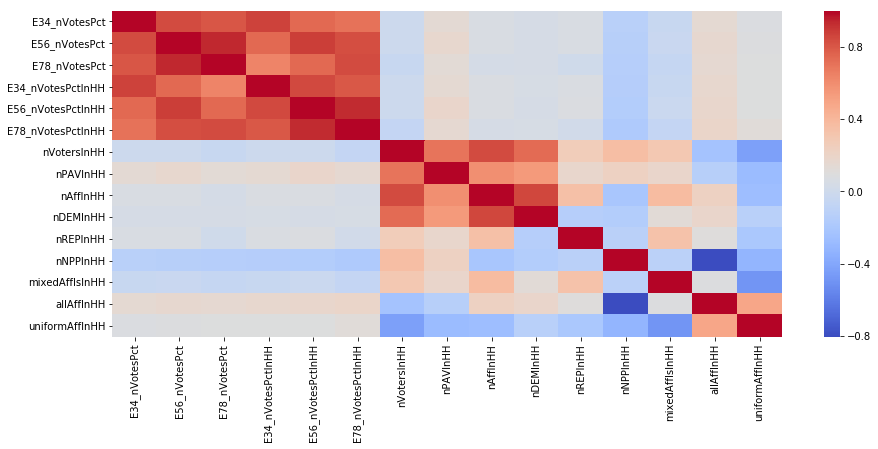

In [75]:
# calculate the correlation matrix
corr = vfc[cols_out + cols_hh_mo + cols_hh].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='coolwarm')
plt.show()

In [58]:
vfc[cols + cols_need_na + cols_out].corr()

,Abbr,Precinct,BirthYear,OldestInHouseBirthYear,IsOldestInHouse,havePhone,sameMailAddress,isApt,Zip,HasParty,isDEM,isREP,isNPP,E34_nVotesPct,E56_nVotesPct,E78_nVotesPct
Abbr,1.000000,0.030848,-0.000566,0.027531,0.037651,-0.028249,-0.035555,0.046193,0.095783,0.000406,0.026616,-0.033653,-0.000326,0.061162,0.081047,0.115448
Precinct,0.030848,1.000000,-0.030181,0.043500,0.088935,-0.010321,-0.019754,0.227459,-0.418098,-0.001257,-0.003371,0.012132,0.000423,0.010929,0.017089,0.021054
BirthYear,-0.000566,-0.030181,1.000000,0.660768,-0.365598,-0.036274,-0.019242,0.022714,0.024202,-0.130194,-0.035936,-0.149292,0.128147,-0.228068,-0.327751,-0.170714
OldestInHouseBirthYear,0.027531,0.043500,0.660768,1.000000,0.163700,-0.015668,-0.000947,0.165752,0.012582,-0.124105,-0.051586,-0.103749,0.122805,-0.175615,-0.239807,-0.100923
IsOldestInHouse,0.037651,0.088935,-0.365598,0.163700,1.000000,0.009351,-0.001746,0.198518,-0.000394,0.005453,-0.009127,0.031765,-0.004791,0.027021,0.057924,0.035346
havePhone,-0.028249,-0.010321,-0.036274,-0.015668,0.009351,1.000000,0.005897,0.002252,0.007284,0.066768,0.041580,0.023659,-0.063468,-0.052187,-0.016199,-0.000426
sameMailAddress,-0.035555,-0.019754,-0.019242,-0.000947,-0.001746,0.005897,1.000000,-0.045917,-0.014047,0.000492,0.004053,0.006234,-0.001307,0.034408,0.038338,0.047737
isApt,0.046193,0.227459,0.022714,0.165752,0.198518,0.002252,-0.045917,1.000000,-0.004446,-0.007332,0.032615,-0.057694,0.005644,-0.046606,-0.058249,-0.012920
Zip,0.095783,-0.418098,0.024202,0.012582,-0.000394,0.007284,-0.014047,-0.004446,1.000000,-0.002743,0.025484,-0.048011,0.001752,-0.055593,-0.070970,-0.054879
HasParty,0.000406,-0.001257,-0.130194,-0.124105,0.005453,0.066768,0.000492,-0.007332,-0.002743,1.000000,0.677118,0.281568,-0.995306,0.134130,0.147570,0.139722


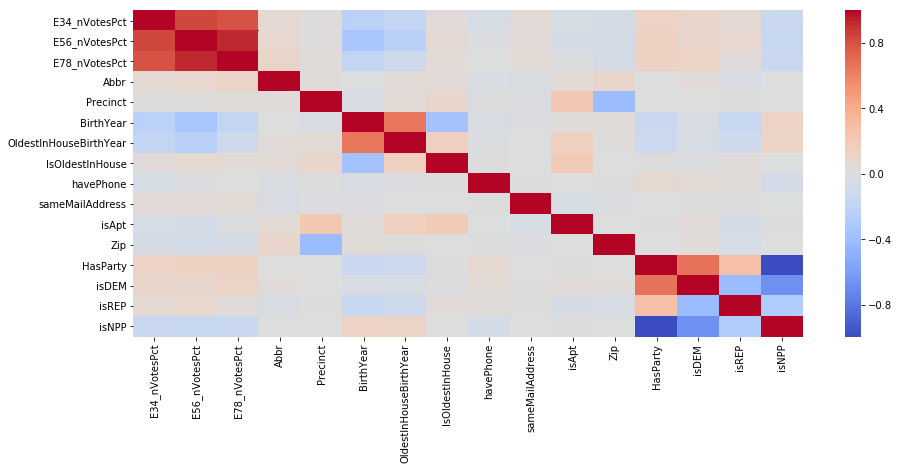

In [76]:
# calculate the correlation matrix
corr = vfc[cols_out + cols + cols_need_na].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='coolwarm')
plt.show()

## Exploring party association

In [27]:
cols_out = ['E34_nVotesPct', 'E56_nVotesPct', 'E78_nVotesPct']
cols_voter_party = ['HasParty','isDEM','isREP','isNPP']
cols_hh_party = ['nVotersInHH','nAffInHH','nDEMInHH','nREPInHH','nNPPInHH',
           'mostAfflsInHH','mixedAfflsInHH','allAffInHH','uniformAffInHH']

In [28]:
single_p_hh = v.loc[v.nVotersInHH == 1, cols_out + cols_voter_party]
multi_p_hh = v.loc[v.nVotersInHH > 1, cols_out + cols_voter_party]

[single_p_hh[c].replace(-1, np.NaN, inplace=True) for c in single_p_hh[cols_out]]
[multi_p_hh[c].replace(-1, np.NaN, inplace=True) for c in multi_p_hh[cols_out]]

[None, None, None]

In [29]:
single_p_hh.head()

,E34_nVotesPct,E56_nVotesPct,E78_nVotesPct,HasParty,isDEM,isREP,isNPP
4,NaN,NaN,NaN,1,1,0,0
28,0.5,0.50,0.666667,1,1,0,0
35,0.5,0.25,0.333333,0,0,0,1
36,NaN,NaN,1.000000,1,1,0,0
41,0.5,0.25,0.500000,0,0,0,1


In [30]:
v_party = v.loc[:, cols_out + ['HasParty']]
[v_party[c].replace(-1, np.NaN, inplace=True) for c in v_party[cols_out]]

[None, None, None]

In [31]:
v_party.head()

,E34_nVotesPct,E56_nVotesPct,E78_nVotesPct,HasParty
0,1.0,1.000000,1.000000,1
1,1.0,0.666667,0.800000,1
2,1.0,0.750000,0.833333,1
3,0.0,0.000000,0.000000,0
4,NaN,NaN,NaN,1


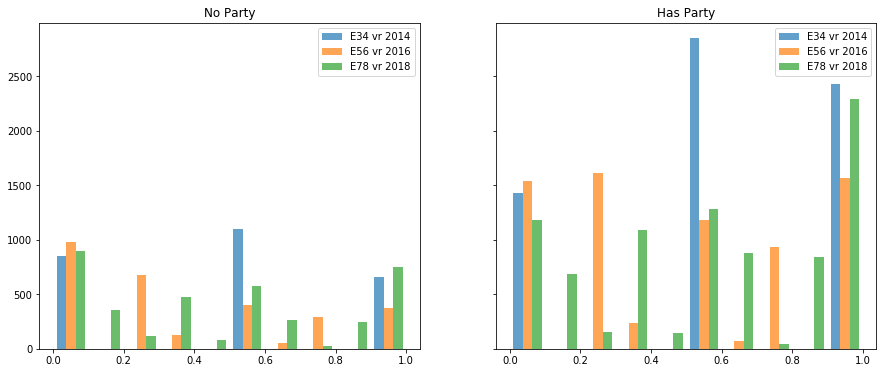

In [32]:
fig, axes = plt.subplots(1,2, sharey=True)

for key, grp in v_party.groupby(['HasParty']):
    axes[key].hist([grp.E34_nVotesPct.dropna(), grp.E56_nVotesPct.dropna(),
                    grp.E78_nVotesPct.dropna()], alpha=0.7, bins=10,
                    label=['E34 vr 2014','E56 vr 2016','E78 vr 2018'])
    axes[key].set_title('No Party' if key==0 else 'Has Party')
    axes[key].legend(loc='best')

plt.show()

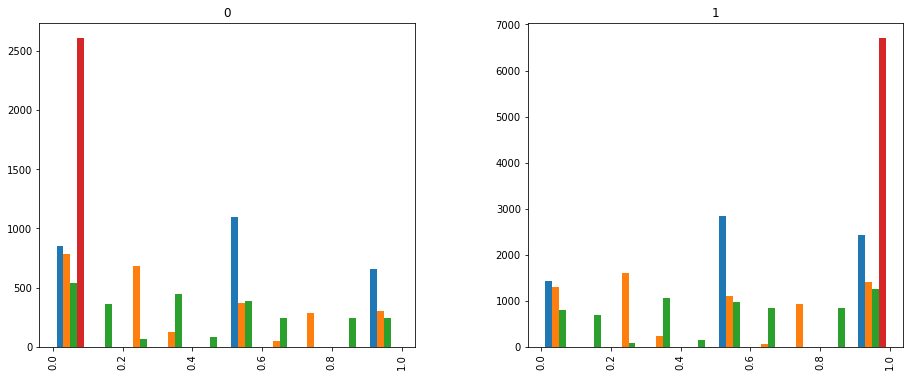

In [33]:
# a quicker way to the same thing!
v_party.hist(column=['E34_nVotesPct', 'E56_nVotesPct', 'E78_nVotesPct'], by='HasParty')
plt.show()

0


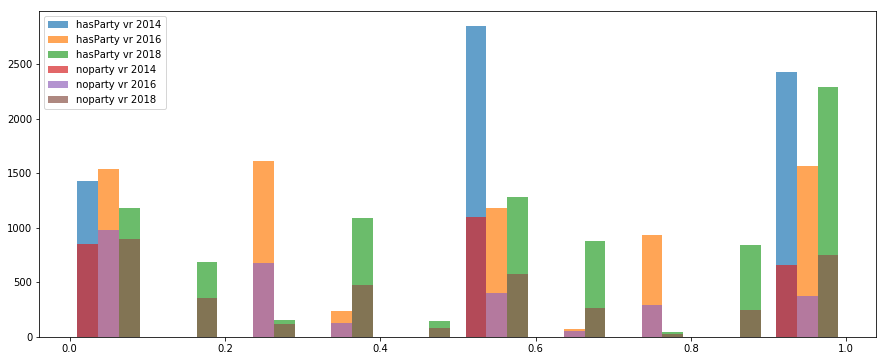

In [34]:
fig, ax = plt.subplots()
fp = []

g = v_party.groupby(['HasParty'])

for key, grp in sorted(g, reverse=True):
    pre = 'noparty' if key ==0 else 'hasParty'
    ax.hist([grp.E34_nVotesPct.dropna(), grp.E56_nVotesPct.dropna(),
             grp.E78_nVotesPct.dropna()], alpha=0.7, bins=10,
            label=[pre + ' vr 2014', pre + ' vr 2016', pre + ' vr 2018'])

print (len(fp))
#ax.hist([d for d in fp], alpha=0.7, bins=10,
#                    label=['noParty vr 2014','noParty vr 2016','noParty vr 2018',
#                           'hasParty vr 2014','hasParty vr 2016','hasParty vr 2018'])
    #axes[key].set_title('No Party' if key==0 else 'Has Party')
ax.legend(loc='best')

plt.show()

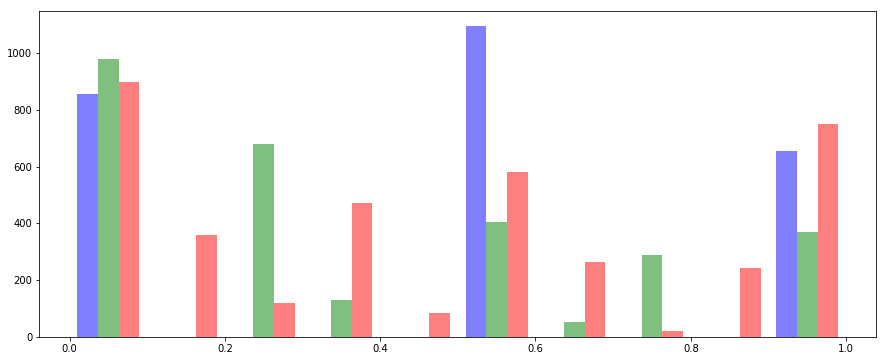

       E34_nVotesPct  E56_nVotesPct  E78_nVotesPct  HasParty
count    2605.000000    2903.000000    3794.000000    4200.0
mean        0.461612       0.356700       0.453040       0.0
std         0.378807       0.344113       0.363973       0.0
min         0.000000       0.000000       0.000000       0.0
25%         0.000000       0.000000       0.166667       0.0
50%         0.500000       0.250000       0.400000       0.0
75%         1.000000       0.500000       0.833333       0.0
max         1.000000       1.000000       1.000000       0.0
key: 1
   E34_nVotesPct  E56_nVotesPct  E78_nVotesPct  HasParty
0            1.0       1.000000       1.000000         1
1            1.0       0.666667       0.800000         1
2            1.0       0.750000       0.833333         1
4            NaN            NaN            NaN         1
5            NaN            NaN            NaN         1


In [35]:
for key, grp in v_party.groupby(['HasParty']):
    if key==0:
        #grp.E34_nVotesPct.plot(kind='hist')
        plt.hist([grp.E34_nVotesPct.dropna(), grp.E56_nVotesPct.dropna(),
                  grp.E78_nVotesPct.dropna()], color=['b','g','r'], 
         alpha=0.5, bins=10,
         label=['E34 vr 2014','E56 vr 2016','E78 vr 2018'])
        plt.show()
        print(grp.describe())
    if key==1:
        print('key: {}'.format(key))
        print(grp.head())

## exploring % rather than counts

In [36]:
voters = v.loc[:, cols_out + ['Vid']]
[voters[c].replace(-1, np.NaN, inplace=True) for c in voters[cols_out]]

[None, None, None]

In [37]:
df1 = voters[['E34_nVotesPct','Vid']].groupby(
    'E34_nVotesPct').agg('count')/voters.E34_nVotesPct.count()
df1 = df1.reset_index().rename(columns={'E34_nVotesPct':'VoteRate', 'Vid':'E34_Votes'})
df2 = voters[['E56_nVotesPct','Vid']].groupby(
    'E56_nVotesPct').agg('count')/voters.E56_nVotesPct.count()
df2 = df2.reset_index().rename(columns={'E56_nVotesPct':'VoteRate', 'Vid':'E56_Votes'})
df3 = voters[['E78_nVotesPct','Vid']].groupby(
    'E78_nVotesPct').agg('count')/voters.E78_nVotesPct.count()
df3 = df3.reset_index().rename(columns={'E78_nVotesPct':'VoteRate', 'Vid':'E78_Votes'})
dfm = pd.merge(pd.merge(df1,df2, on='VoteRate', how='outer'),df3, on='VoteRate', how='outer')
dfm = dfm.set_index('VoteRate').sort_index()

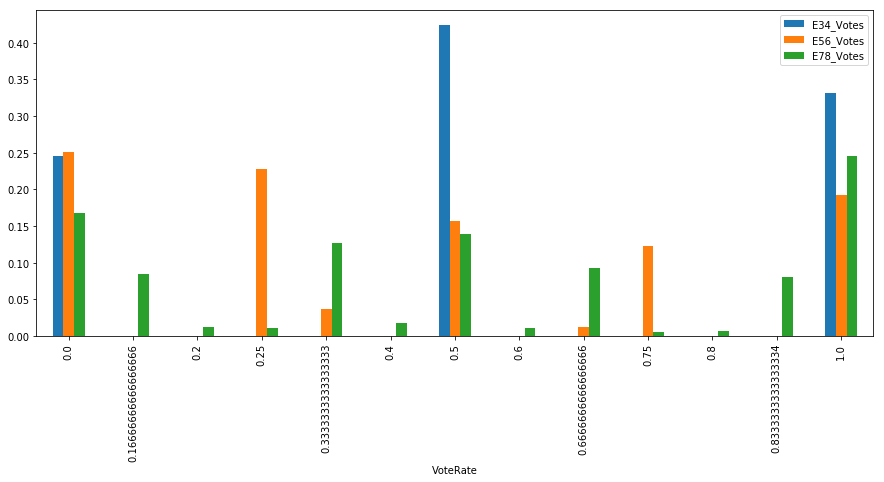

In [38]:
dfm.plot(kind='bar')
plt.show()

## exploring % of 'hasParty' rather than counts

In [39]:
# getting the voters, their voterates for each election cycle and if they have a party
voters = v.loc[:, cols_out + ['Vid', 'HasParty']]
# setting voterates to NaN if we don't have data for that observation
[voters[c].replace(-1, np.NaN, inplace=True) for c in voters[cols_out]]

[None, None, None]

In [40]:
# calculating the vote rates for each election cycle and group as a % of number of voters
dfm = []
for key, grp in voters.groupby(['HasParty']):
    pre = 'noParty' if key ==0 else 'hasParty'
    df1 = grp[['E34_nVotesPct','Vid']].groupby(
        'E34_nVotesPct').agg('count')/grp.E34_nVotesPct.count()
    df1 = df1.reset_index().rename(columns={'E34_nVotesPct':'VoteRate', 'Vid':pre+'E34_Votes'})
    df2 = grp[['E56_nVotesPct','Vid']].groupby(
        'E56_nVotesPct').agg('count')/grp.E56_nVotesPct.count()
    df2 = df2.reset_index().rename(columns={'E56_nVotesPct':'VoteRate', 'Vid':pre+'E56_Votes'})
    df3 = grp[['E78_nVotesPct','Vid']].groupby(
        'E78_nVotesPct').agg('count')/grp.E78_nVotesPct.count()
    df3 = df3.reset_index().rename(columns={'E78_nVotesPct':'VoteRate', 'Vid':pre+'E78_Votes'})
    dfm.append(pd.merge(pd.merge(df1,df2, on='VoteRate', how='outer'),
                   df3, on='VoteRate', how='outer').set_index('VoteRate').sort_index())

pd.concat([dfm[0], dfm[1]], axis=1).head()

,noPartyE34_Votes,noPartyE56_Votes,noPartyE78_Votes,hasPartyE34_Votes,hasPartyE56_Votes,hasPartyE78_Votes
VoteRate,,,,,,
0.000000,0.328215,0.337926,0.236690,0.213198,0.215546,0.136999
0.166667,NaN,NaN,0.094623,NaN,NaN,0.079567
0.200000,NaN,NaN,0.016342,NaN,NaN,0.009553
0.250000,NaN,0.233896,0.014760,NaN,0.226050,0.008621
0.333333,NaN,0.044437,0.124671,NaN,0.033193,0.127213


In [41]:
t = dfm[0].iloc[:,[0]].dropna()
print('Looking at the {} data'.format(t.columns[0]))
print('    {:.2f}% of these voters are likely to never vote \n    {:.2f}% of these voters are likely to always vote'.format(
t.iloc[0,0]*100,t.iloc[2,0]*100))
t


Looking at the noPartyE34_Votes data
    32.82% of these voters are likely to never vote 
    25.14% of these voters are likely to always vote


,noPartyE34_Votes
VoteRate,
0.0,0.328215
0.5,0.420345
1.0,0.251440


In [42]:
t = dfm[1].iloc[:,[0]].dropna()
print('Looking at the {} data'.format(t.columns[0]))
print('    {:.2f}% of these voters are likely to never vote \n    {:.2f}% of these voters are likely to always vote'.format(
t.iloc[0,0]*100,t.iloc[2,0]*100))
t

Looking at the hasPartyE34_Votes data
    21.32% of these voters are likely to never vote 
    36.17% of these voters are likely to always vote


,hasPartyE34_Votes
VoteRate,
0.0,0.213198
0.5,0.425052
1.0,0.361750


In [43]:
#[dfm[0][[c]].dropna() for c in dfm[0].columns[::-1]]
#[dfm[0][[c]].dropna() for c in dfm[0].columns]

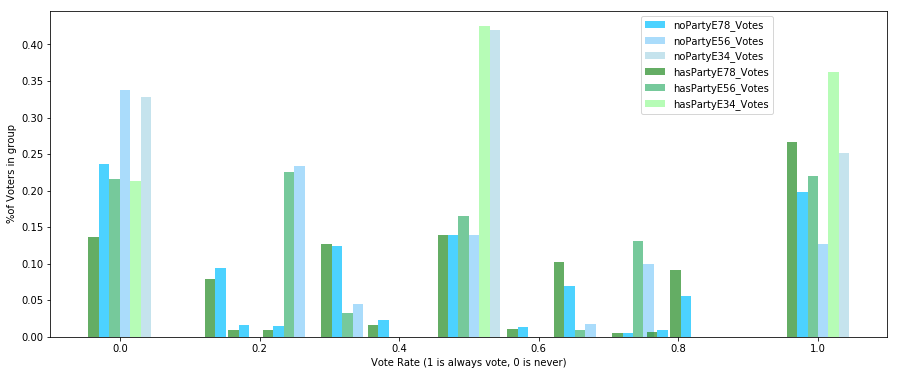

In [44]:
fig, ax = plt.subplots()

for idx, d in enumerate(dfm):
    w = 0.015
    shs = (-2,0,2) if idx==0 else (-3,-1,1)
    cs = ('deepskyblue','lightskyblue','lightblue') if idx==0 else ('forestgreen','mediumseagreen','palegreen')
    for idx, dd in enumerate([d[[c]].dropna() for c in d.columns[::-1]]):
        sh = shs[idx]*w
        ax.bar(dd.index+sh, dd.iloc[:,0], w, alpha=0.7, align='edge', label=dd.columns[0],
              color=cs[idx])

#plt.legend(loc='best')
plt.legend(bbox_to_anchor=(0.7,1))
plt.ylabel('%of Voters in group')
plt.xlabel('Vote Rate (1 is always vote, 0 is never)')
plt.show()

In [45]:
nop = dfm[0].loc[[0,1],:]
wp = dfm[1].loc[[0,1],:]
pd.concat([nop, wp], axis=1)
wp.rename(columns={'hasPartyE34_Votes':'E34', 'hasPartyE56_Votes':'E56',
                   'hasPartyE78_Votes':'E78'}, inplace=True)
nop.rename(columns={'noPartyE34_Votes':'E34', 'noPartyE56_Votes':'E56',
                   'noPartyE78_Votes':'E78'}, inplace=True)
wp-nop

,E34,E56,E78
VoteRate,,,
0,-0.115017,-0.122380,-0.099690
1,0.110310,0.092013,0.068948


##### Conclusion: having a party affiliation increases your probability of voting ~ 10%

In [46]:
v.Party.value_counts()

DEM    6634
NPP    4173
REP    1952
AI      266
LIB      71
GRN      49
IND      46
PF       37
UNK      27
MIS      17
MP       11
NAT       5
RAP       3
REF       3
AME       2
ACP       2
AC        2
NCM       1
LBL       1
NMB       1
PPC       1
EGA       1
CNP       1
ANA       1
Name: Party, dtype: int64